<a href="https://colab.research.google.com/github/Ulrike13/Schelling-s-model/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

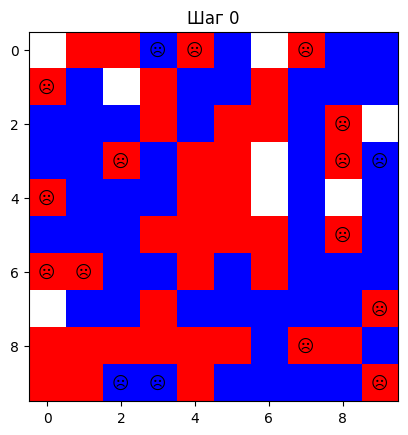

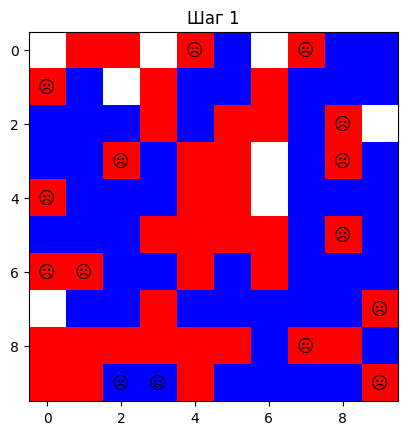

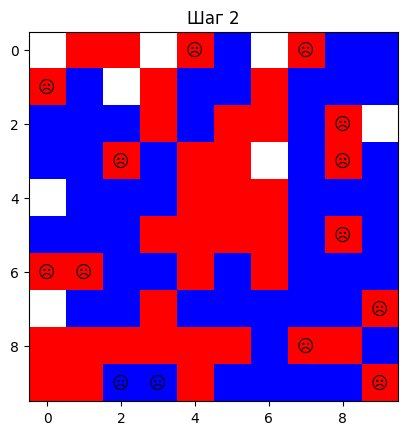

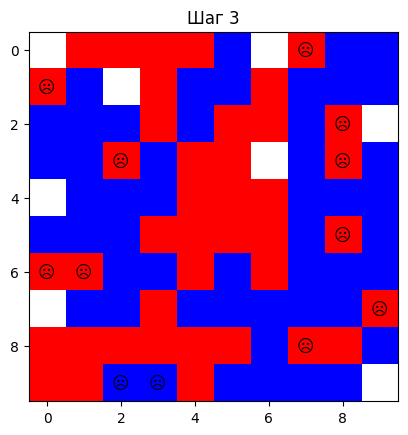

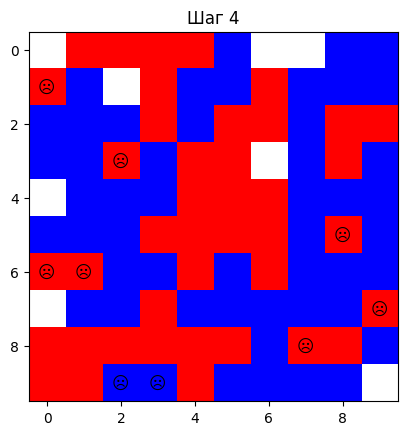

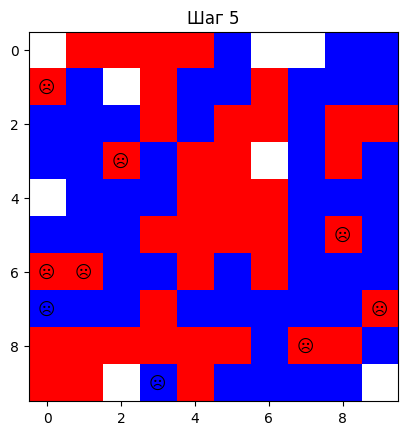

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

def initialize_grid(n):
    grid = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            rand_num = random.uniform(0, 1)
            if rand_num <= 0.45:
                grid[i, j] = 1  # Красная клетка
            elif rand_num <= 0.9:
                grid[i, j] = 2  # Синяя клетка
            else:
                grid[i, j] = 0  # Пустая клетка
    return grid

def count_neighbors(grid, i, j):
    n = grid.shape[0]
    count = 0
    for x in range(max(0, i-1), min(n, i+2)):
        for y in range(max(0, j-1), min(n, j+2)):
            if not (x == i and y == j) and grid[x, y] == grid[i, j]:
                count += 1
    return count

def find_unhappy_cells(grid):
    n = grid.shape[0]
    unhappy_cells = [(i, j) for i in range(n) for j in range(n) if count_neighbors(grid, i, j) < 2 and grid[i, j] != 0]
    return unhappy_cells

def move_cell(grid, from_i, from_j, to_i, to_j):
    grid[to_i, to_j] = grid[from_i, from_j]
    grid[from_i, from_j] = 0

def visualize(grid, iteration):
    cmap = mcolors.ListedColormap(['white', 'red', 'blue'])
    plt.imshow(grid, cmap=cmap, interpolation='none')

    # Добавляем подпись
    plt.title(f'Шаг {iteration}')

    # Добавляем смайлик для несчастливых клеток (если они есть)
    unhappy_cells = find_unhappy_cells(grid)
    for unhappy_i, unhappy_j in unhappy_cells:
        plt.text(unhappy_j, unhappy_i, '☹️', ha='center', va='center', color='black', fontsize=12)

    plt.show()

def main(n, steps):
    grid = initialize_grid(n)
    visualize(grid, 0)

    for iteration in range(1, steps + 1):
        unhappy_cells = find_unhappy_cells(grid)
        if unhappy_cells:
            unhappy_i, unhappy_j = random.choice(unhappy_cells)
            empty_cells = [(i, j) for i in range(n) for j in range(n) if grid[i, j] == 0]
            if empty_cells:
                to_i, to_j = random.choice(empty_cells)
                move_cell(grid, unhappy_i, unhappy_j, to_i, to_j)
        visualize(grid, iteration)

if __name__ == "__main__":
    grid_size = 10  # Размер сетки (n x n)
    simulation_steps = 5  # Количество шагов моделирования (сделал меньше для примера)
    main(grid_size, simulation_steps)
